In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

df = scipy.io.loadmat('Dataset1.mat')

In [3]:
#functions

def averager(dataset):
    
    averaged=[]

    for i in range(len(dataset)):
        averaged.append(np.mean(dataset[i,:]))
    return averaged

In [4]:
direction=df["direction"]
direction

array([[3],
       [5],
       [5],
       [2],
       [6],
       [3],
       [7],
       [4],
       [3],
       [4],
       [2],
       [1],
       [8],
       [5],
       [4],
       [2],
       [4],
       [7],
       [5],
       [2],
       [5],
       [1],
       [5],
       [4],
       [3],
       [6],
       [8],
       [1],
       [1],
       [3],
       [5],
       [7],
       [4],
       [1],
       [3],
       [7],
       [8],
       [5],
       [5],
       [2],
       [3],
       [7],
       [1],
       [8],
       [5],
       [3],
       [7],
       [4],
       [2],
       [5],
       [8],
       [8],
       [5],
       [7],
       [7],
       [4],
       [2],
       [6],
       [4],
       [6],
       [6],
       [5],
       [4],
       [3],
       [5],
       [6],
       [7],
       [8],
       [3],
       [4],
       [1],
       [8],
       [5],
       [3],
       [3],
       [1],
       [5],
       [6],
       [6],
       [3],
       [7],
       [3],
       [1],
    

In [5]:
R=df["R"]
R

array([[ 0.        ,  0.6813072 ,  0.80143189, ...,  3.45837272,
         3.71800963,  5.80527451],
       [ 6.18230944, 23.16444485,  8.81575081, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.06076981,  0.        ,  0.        , ...,  2.07502363,
         3.09834135,  1.65864986],
       ...,
       [ 2.06076981,  5.45045761,  3.20572757, ...,  2.07502363,
         3.09834135,  1.65864986],
       [ 1.37384654,  0.6813072 ,  1.60286378, ...,  0.        ,
         1.85900481,  0.        ],
       [ 1.37384654,  3.40653601,  0.80143189, ...,  4.15004726,
         1.23933654,  3.31729972]])

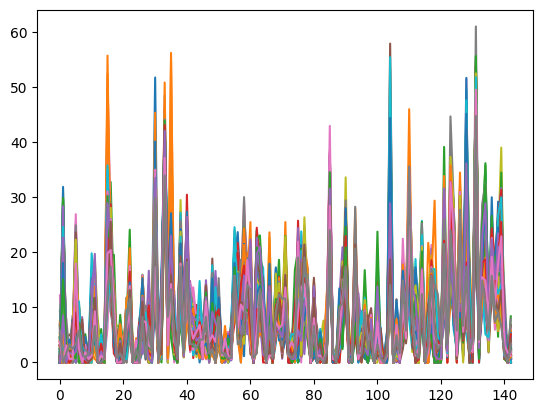

In [6]:
plt.plot(R)

Text(0, 0.5, 'fire rate')

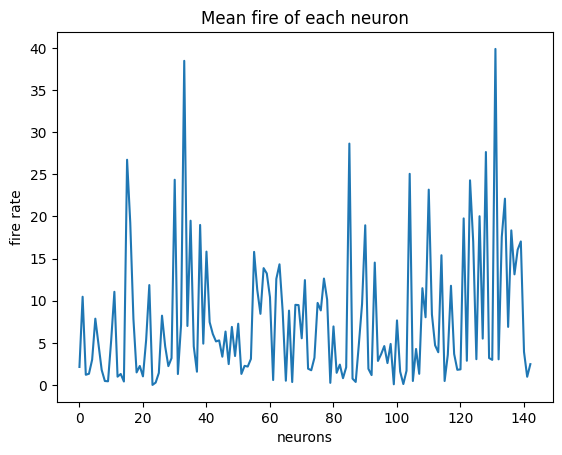

In [7]:
meanR=np.mean(R,axis=1)
plt.plot(meanR)
plt.title("Mean fire of each neuron")
plt.xlabel("neurons")
plt.ylabel("fire rate")

In [8]:
#trials
direction=direction.reshape(-1)
print(direction.shape)
for dir_val in range(1,9):
    indices = np.where(direction==dir_val)[0]
    print(direction[indices].shape[0],"trials for direction", dir_val)

(158,)
14 trials for direction 1
12 trials for direction 2
22 trials for direction 3
20 trials for direction 4
25 trials for direction 5
24 trials for direction 6
24 trials for direction 7
17 trials for direction 8


Text(0, 0.5, 'fire_rate')

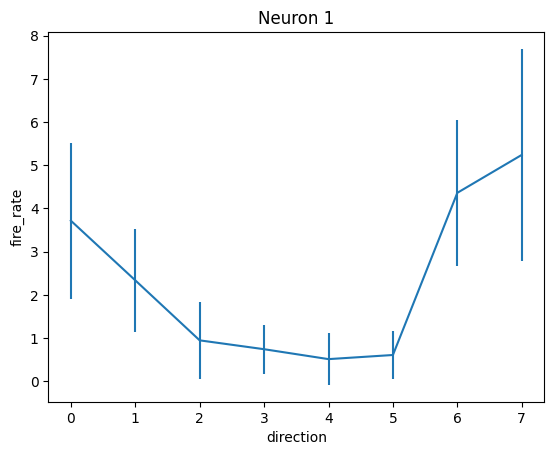

In [9]:
#firing rates of neuron1
mean_dir=[]
std_dir=[]
for dir_val in range(1,9):
    indices = np.where(direction==dir_val)[0]
    mean_dir.append(R[0,indices].mean(axis=0))
    std_dir.append(np.std(R[0,indices]))

plt.errorbar(range(8),mean_dir,yerr=std_dir)
plt.title("Neuron 1")
plt.xlabel("direction")
plt.ylabel("fire_rate")

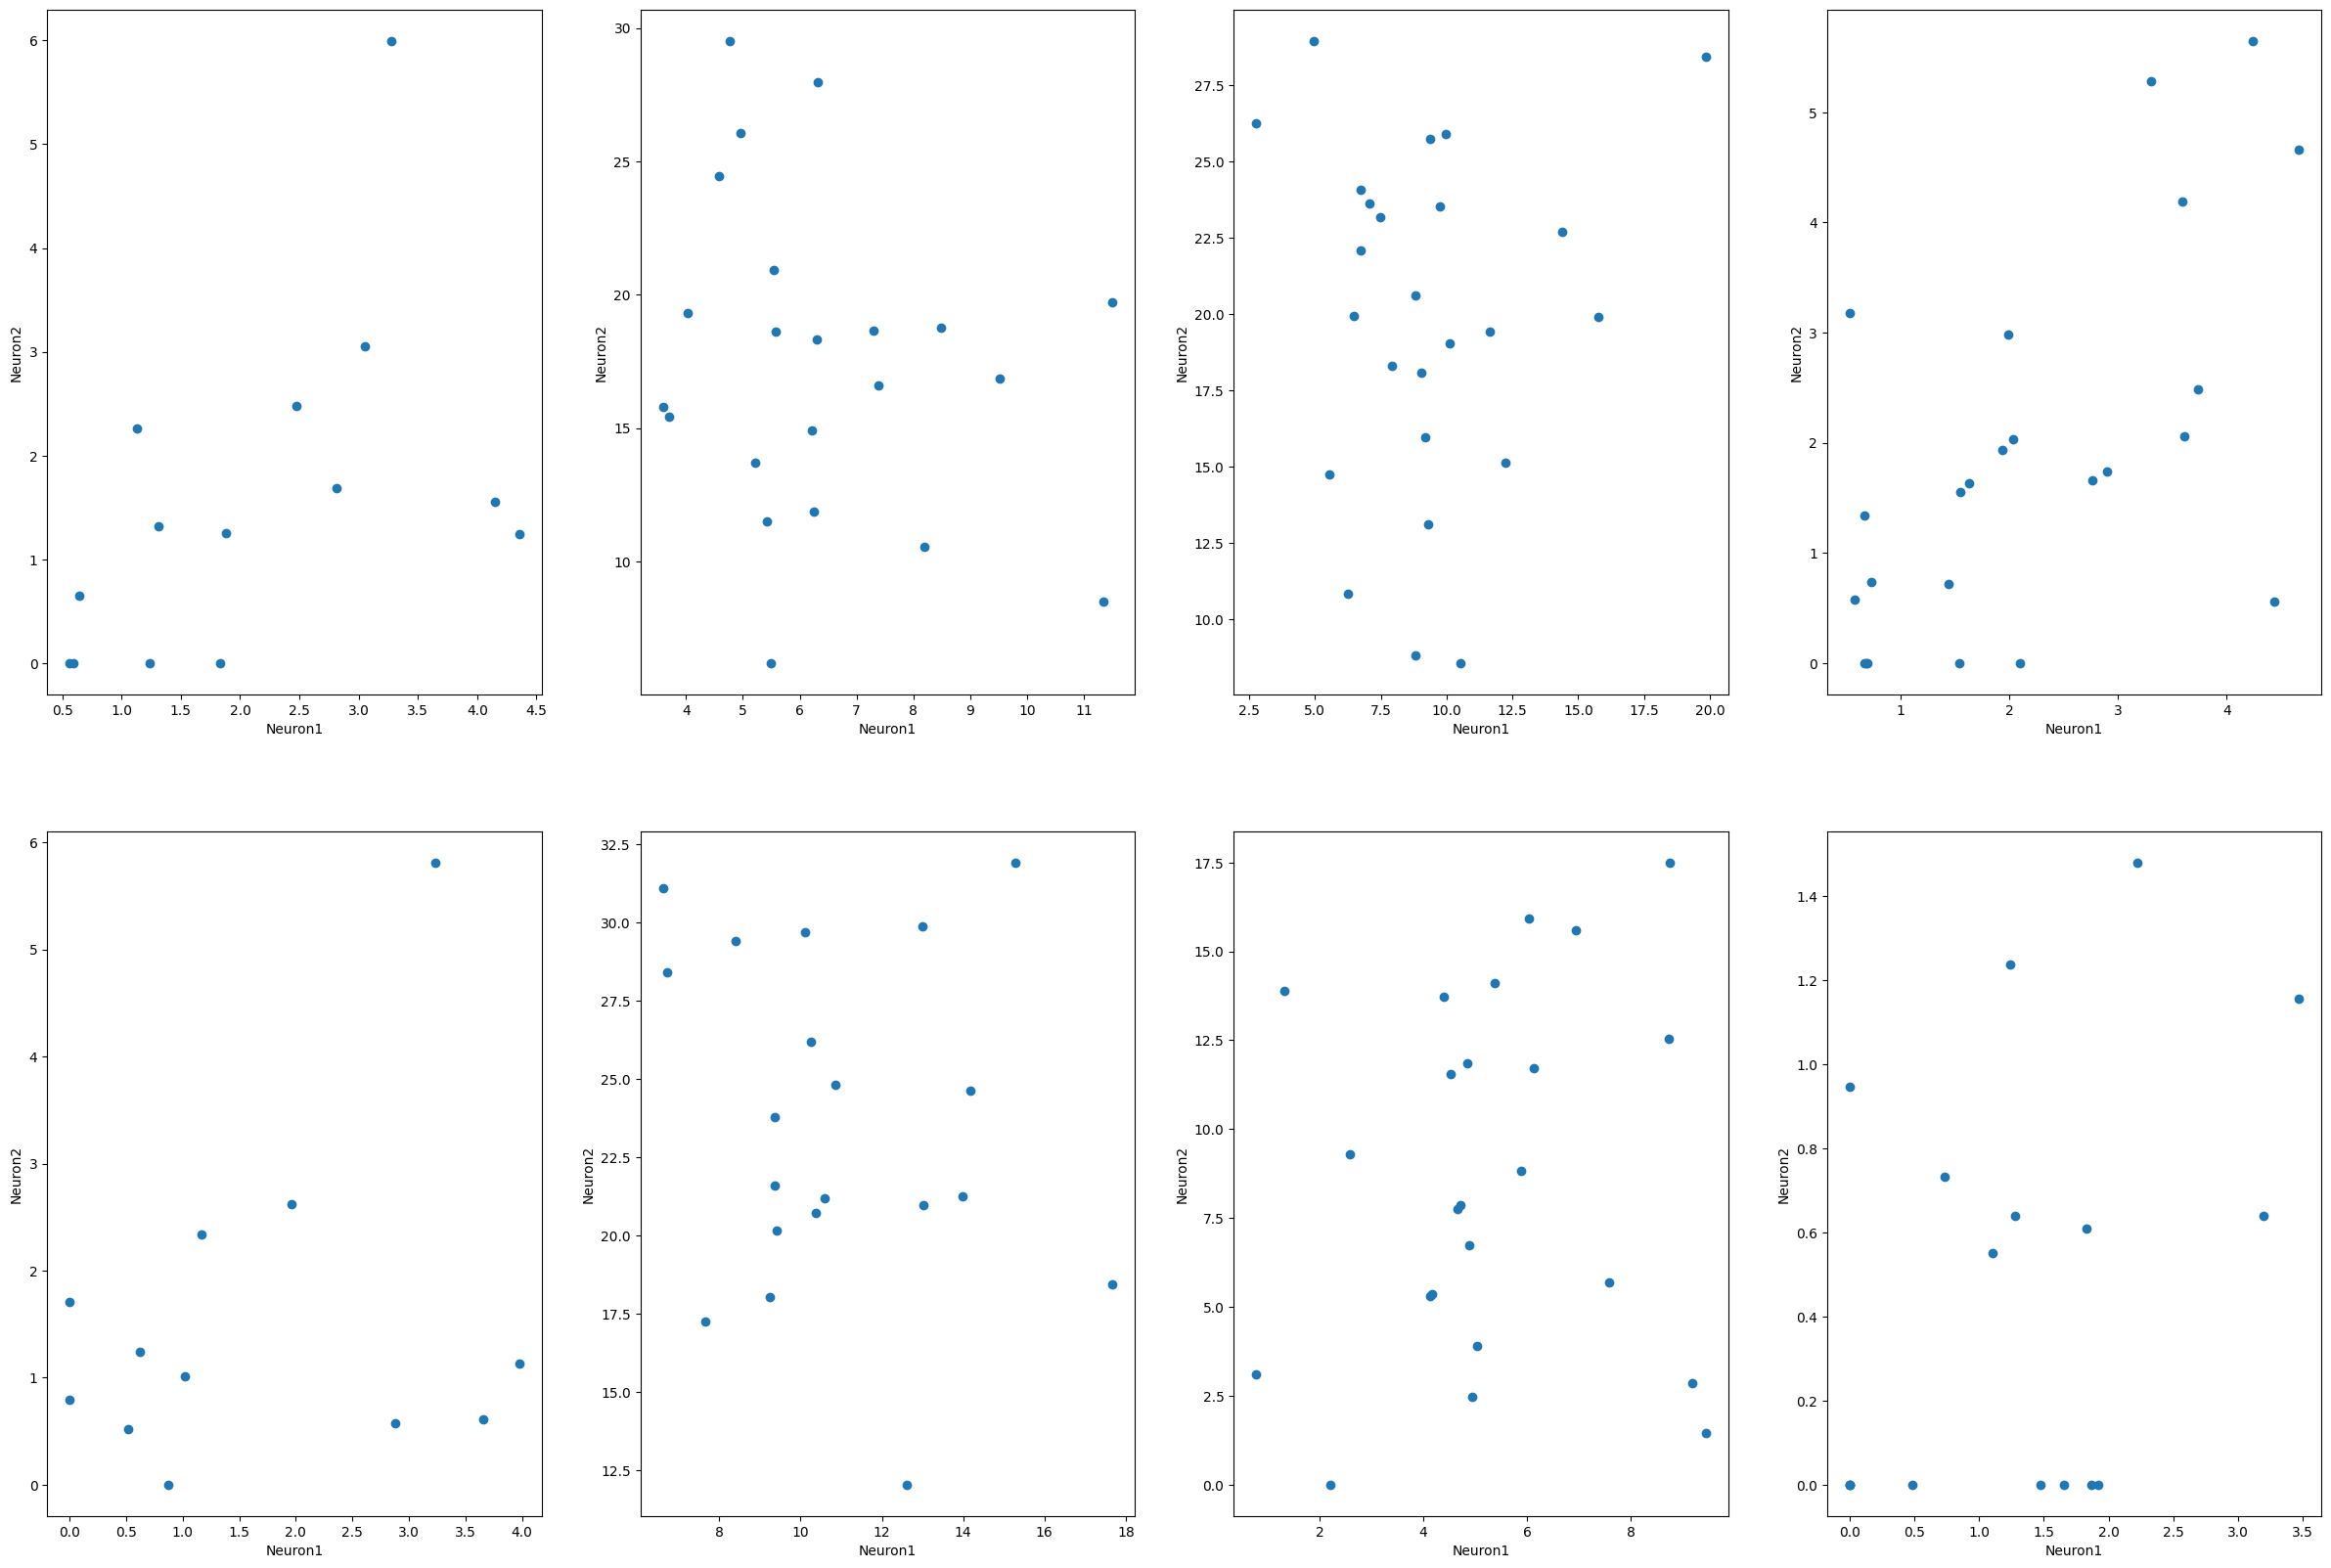

In [10]:
#neuron1 vs neuron 2 direction 0
#seems to be roughly aligned?


fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(30,20))
_=1
for j in range(4):  
    for i in range(2):
        
        ax[i,j].scatter(R[10,np.where(direction==_)[0]],R[1,np.where(direction==_)[0]])
        
        ax[i,j].set_xlabel("Neuron1")
        ax[i,j].set_ylabel("Neuron2")
        _+=1




fig,ax=plt.subplots(nrows=5,ncols=5,figsize=(100,40))
for j in range(25):  
        mean_dir=[]
        std_dir=[]
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            mean_dir.append(R[j,indices].mean(axis=0))
            std_dir.append(np.std(R[j,indices]))
        ax[j%5,j//5].errorbar(range(8),mean_dir,yerr=std_dir)
        ax[i].title("Neuron 1")
        ax[j%5,j//5].set_xlabel("direction")
        ax[j%5,j//5].set_ylabel("fire_rate")

plt.tight_layout()

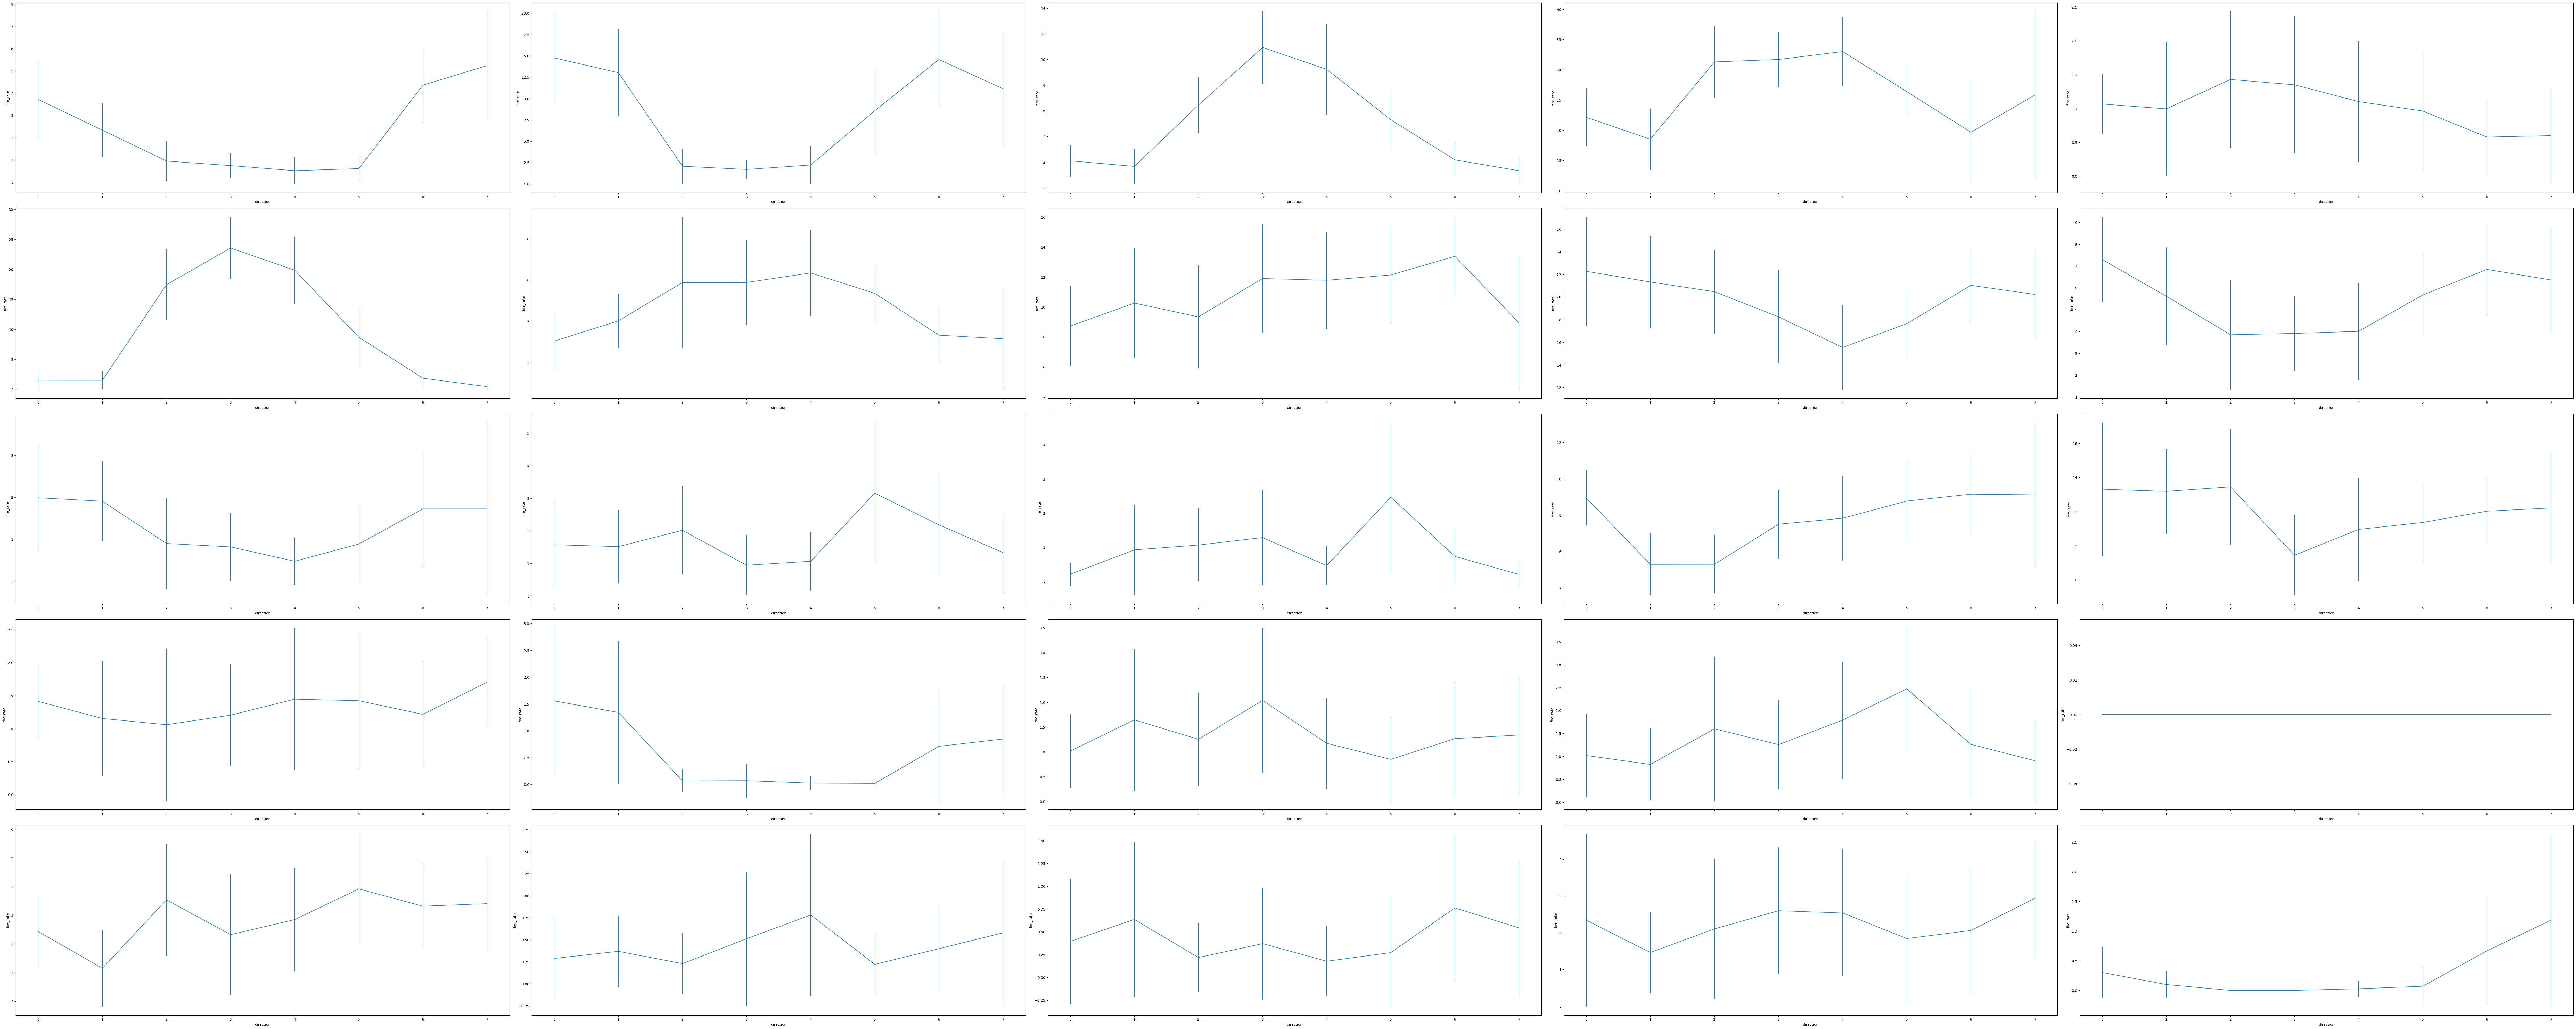

In [11]:
fig,ax=plt.subplots(nrows=5,ncols=5,figsize=(100,40))
for j in range(25):  
        mean_dir=[]
        std_dir=[]
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            mean_dir.append(R[j,indices].mean(axis=0))
            std_dir.append(np.std(R[j,indices]))

        ax[j%5,j//5].errorbar(range(8),mean_dir,yerr=std_dir)
        #ax[i].title("Neuron 1")
        ax[j%5,j//5].set_xlabel("direction")
        ax[j%5,j//5].set_ylabel("fire_rate")

plt.tight_layout()

1.1592409749756558
1.4321957343264484
0.5440015009733694
4.999999957986565
0.6564066675837728
0.660660972875496
0.38459071136891054
4.999999993285547
1.5338364922249585
4.99999999932703


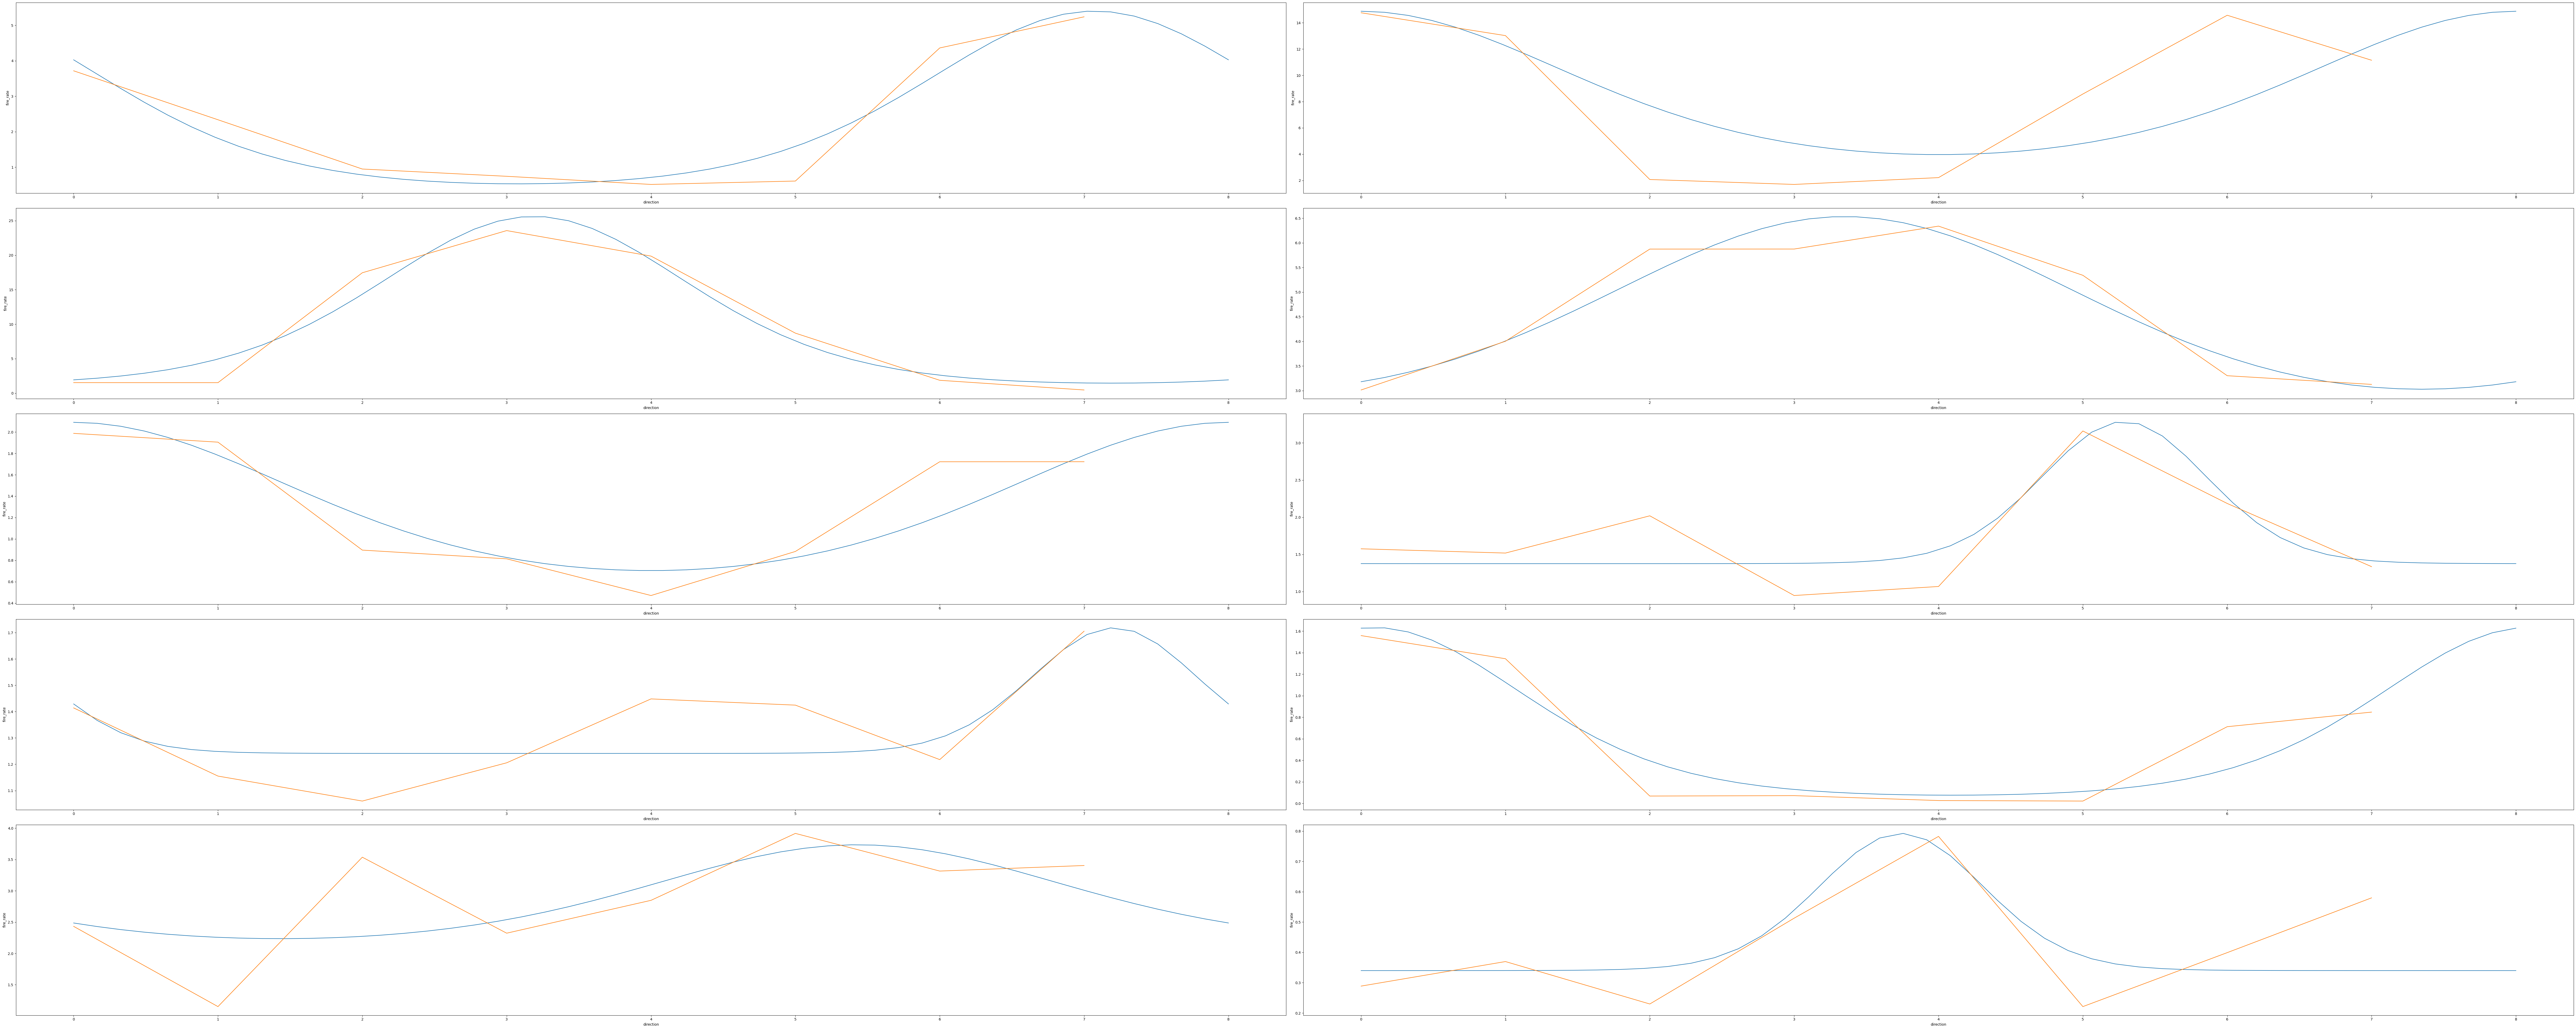

In [12]:
#lets try the fitter
# https://gist.github.com/laurentperrinet/de76f53fcb0820844fbf0317ed832035
#pip install lmfit
from lmfit import Model, Parameters
# https://en.wikipedia.org/wiki/Von_Mises_distribution
def tuning_function(theta, theta0, kappa, fmax, bsl, theta_bound):
    # Von Mises, with kappa the concentration, theta0 the location
    # fmax the firing rate at pref ori, bsl the min firing rate (not the baseline, which was substracted) 
    tf = bsl + np.exp(kappa*(np.cos(2*np.pi/theta_bound*(theta-theta0))-1)) * (fmax-bsl)
    return tf

def fit_tc(array, init_kappa, theta_bound=2*np.pi):
    """
    Fits the data points in `array` to `tuning_function`.
    
    set theta_bound to 2*np.pi for fitting signed angles (eg dirrection)
    or to np.pi for an unsigned one (like orientation)
    """
              
    theta = np.linspace(0, theta_bound, len(array), endpoint=False)
    mod = Model(tuning_function)
    pars = Parameters()
    #               name    default           vary  min   max
    pars.add_many(('theta0', theta[np.argmax(array)], True, 0., theta_bound),
                  ('kappa', init_kappa, True,  .1, 5.),
                  ('fmax', np.max(array), True, 0.0, 2*np.max(array)+5),
                  ('bsl', np.min(array), True, 0.0, np.max(array)+5),
                  ('theta_bound', theta_bound, False))
                
    out = mod.fit(array, pars, theta=theta, nan_policy='omit', max_nfev=50000)

    return out.best_values

fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(100,40))
for j in range(10):  
        mean_dir=[]
        std_dir=[]
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            mean_dir.append(R[j,indices].mean(axis=0))
            std_dir.append(np.std(R[j,indices]))
        fit_pars=fit_tc(np.array(mean_dir),3.5,theta_bound=8)
        print(fit_pars["kappa"])
        rangeforfit=np.linspace(0,8)
        ax[j%5,j//5].plot(rangeforfit,tuning_function(rangeforfit,**fit_pars))
        ax[j%5,j//5].plot(range(8),mean_dir)
        #ax[i].title("Neuron 1")
        ax[j%5,j//5].set_xlabel("direction")
        ax[j%5,j//5].set_ylabel("fire_rate")
        
plt.tight_layout()

90 useless neurons?


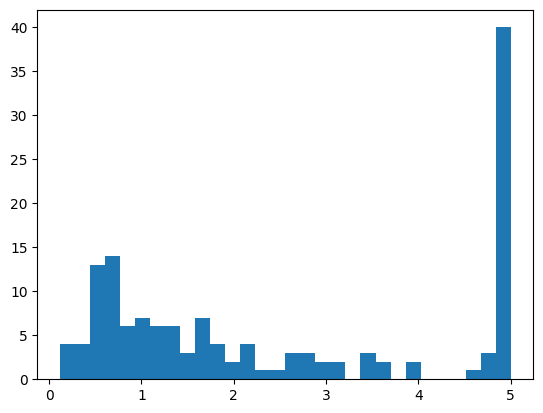

In [13]:
#for some reason I consider that having a good fitting value in mises(k)
#will have a better precision on neurons
hkneurons=[]
k=[]
theta=[]
thr=3
for j in range(len(R)):  
        mean_dir=[]
        std_dir=[]
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            mean_dir.append(R[j,indices].mean(axis=0))
            #std_dir.append(np.std(R[j,indices]))
        fit_pars=fit_tc(np.array(mean_dir),7,theta_bound=8)
        k.append(fit_pars["kappa"])
        theta.append(fit_pars["theta0"])
        if k[-1]>=thr:
        
            hkneurons.append(i)
plt.hist(k,bins=30)
print(len(k)-len(hkneurons),"useless neurons?")
#some neurons have value for us and some dont

(array([19., 10., 24., 31., 12.,  9., 18., 20.]),
 array([0.        , 1.        , 2.        , 3.        , 3.99999999,
        4.99999999, 5.99999999, 6.99999999, 7.99999999]),
 <BarContainer object of 8 artists>)

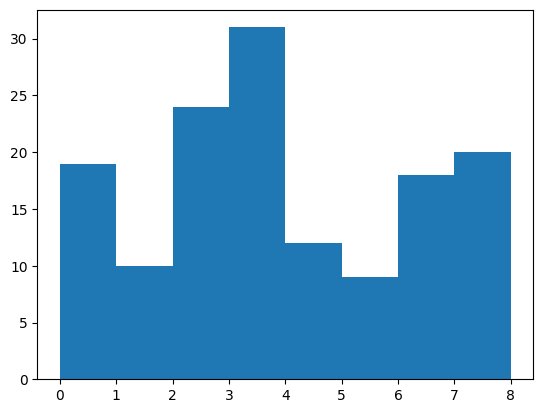

In [14]:
plt.hist(theta,bins=8)
#many neurons like directions 3 and 4

In [15]:
#pca
#rom sklearn.decomposition import PCA
!#pip install sklearn
import sklearn.decomposition
pca=sklearn.decomposition.PCA(n_components=2)
#pca.fit(R.T)

#print(pca.explained_variance_ratio_)


In [16]:
pcaed=pca.fit_transform(R.T)
print(len(pcaed))
print(pca.explained_variance_ratio_)

158
[0.34416885 0.09124433]


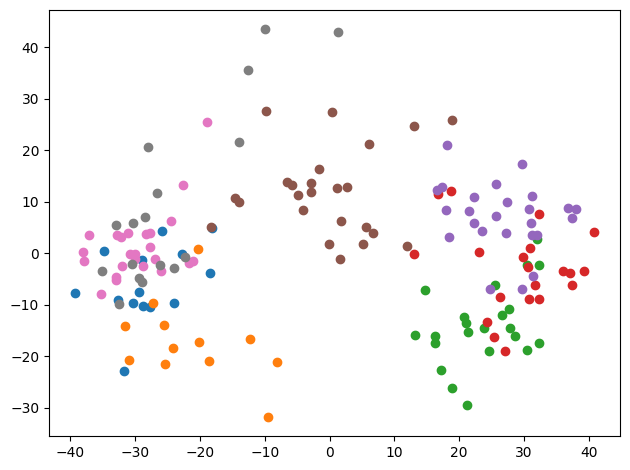

In [17]:
#fig,ax=plt.subplots(nrows=4,ncols=2)
dir_val=1
for i in range(4):
    for j in range(2):
        
            indices = np.where(direction==dir_val)[0]
            

            plt.scatter(pcaed[indices,0],pcaed[indices,1])
            dir_val+=1
           
        
plt.tight_layout()

In [18]:
#pca for average

average_neurons=np.zeros((143,8))
print(average_neurons.shape)
print(R.shape)
for j in range(len(R)):  
        mean_dir=[]
        
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            average_neurons[j,dir_val-1]=R[j,indices].mean(axis=0)
average_neurons.shape
            

(143, 8)
(143, 158)


(143, 8)

158
[0.34674576 0.09164376]
[[-25.47092143   3.50809036]
 [-18.62047771  15.1271414 ]
 [ 26.14463639  18.89929163]
 [ 32.36685725   0.46218023]
 [ 29.92665778 -10.92245204]
 [  3.41387952 -16.88424141]
 [-25.96724159  -5.84420577]
 [-21.79339022  -4.3458044 ]]


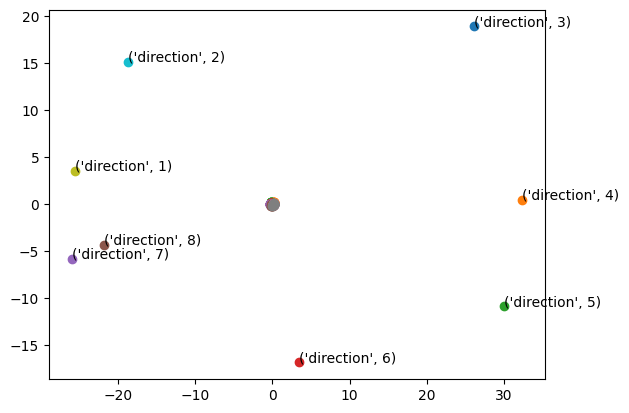

In [19]:
from sklearn.preprocessing import normalize

pcaed=pca.fit_transform(normalize(R.T,axis=1))
print(len(pcaed))
print(pca.explained_variance_ratio_)
dir_val=1
for i in range(4):
    for j in range(2):
        
            indices = np.where(direction==dir_val)[0]
            

            plt.scatter(pcaed[indices,0],pcaed[indices,1])
            dir_val+=1
           

pcaed=pca.fit_transform(average_neurons.T)
print(pcaed)


for j in range(1,9):
        
            text="direction",j
            

            plt.scatter(pcaed[j-1,0],pcaed[j-1,1])
            plt.annotate(text,(pcaed[j-1,0],pcaed[j-1,1]))
            
           
        
#plt.tight_layout()

[[-0.18802915  0.02511032]
 [-0.13714674  0.11961072]
 [ 0.1833049   0.13153019]
 [ 0.23498976  0.01055781]
 [ 0.22000151 -0.07156571]
 [ 0.0379335  -0.12938706]
 [-0.19218733 -0.04644469]
 [-0.15886645 -0.03941156]]


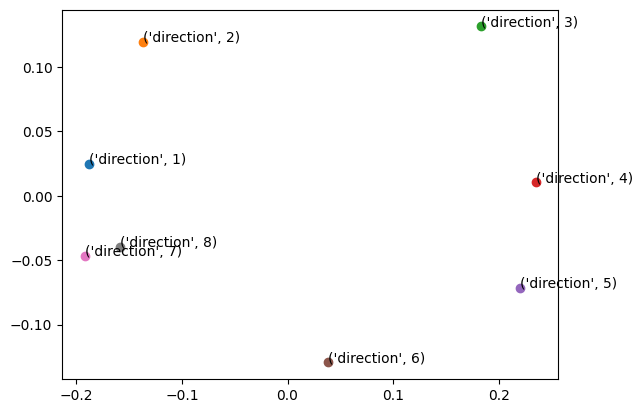

In [20]:

pcaed=pca.fit_transform(normalize(average_neurons.T,axis=1))
print(pcaed)


for j in range(1,9):
        
            text="direction",j
            

            plt.scatter(pcaed[j-1,0],pcaed[j-1,1])
            plt.annotate(text,(pcaed[j-1,0],pcaed[j-1,1]))
            
           
        
#plt.tight_layout()



In [21]:
vonmisesR=np.zeros((143,158))


for j in range(143):  
        mean_dir=[]
       
        for dir_val in range(1,9):
            indices = np.where(direction==dir_val)[0]
            mean_dir.append(R[j,indices].mean(axis=0))
            
        fit_pars=fit_tc(np.array(mean_dir),3.5,theta_bound=8)
        range_for_fit=np.linspace(0,8,158)
        vonmisesR[j,:]=tuning_function(range_for_fit,**fit_pars)
        
print(vonmisesR.shape)

(143, 158)


158
[0.74490522 0.18591878]
[[-25.47092143   3.50809036]
 [-18.62047771  15.1271414 ]
 [ 26.14463639  18.89929163]
 [ 32.36685725   0.46218023]
 [ 29.92665778 -10.92245204]
 [  3.41387952 -16.88424141]
 [-25.96724159  -5.84420577]
 [-21.79339022  -4.3458044 ]]


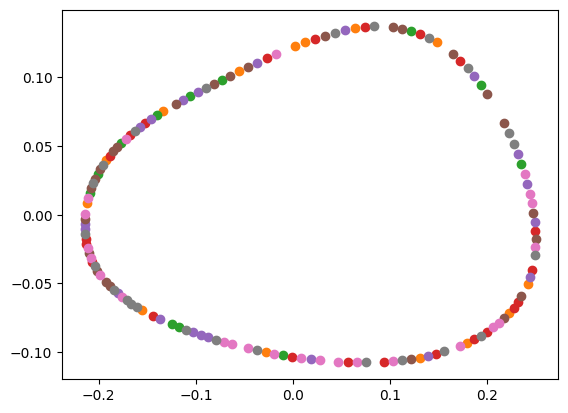

In [22]:
from sklearn.preprocessing import normalize

pcaed=pca.fit_transform(normalize(vonmisesR.T,axis=1))
print(len(pcaed))
print(pca.explained_variance_ratio_)
dir_val=0
for i in range(4):
    for j in range(2):
    
        
            indices = np.where(direction==dir_val)[0]
            

            plt.scatter(pcaed[indices,0],pcaed[indices,1])
            dir_val+=1
           

pcaed=pca.fit_transform(average_neurons.T)
print(pcaed)

In [23]:
from sklearn.preprocessing import normalize

pcaed=pca.fit_transform(normalize(vonmisesR.T,axis=1))

print(len(pcaed))
print(pca.explained_variance_ratio_)
indices=np.array(range(158))

dir_val=0
for i in range(4):
    for j in range(2):
        
            #indices = 158//8
            
            plt.scatter(pcaed[indices[dir_val*158//8:dir_val*158//8+158//8],0],
                        pcaed[indices[dir_val*158//8:dir_val*158//8+158//8],1])
            plt.annotate(("dir",dir_val),(pcaed[indices[dir_val*158//8:dir_val*158//8+158//8],0],
                        pcaed[indices[dir_val*158//8:dir_val*158//8+158//8],1]))
            dir_val+=1
           


158
[0.74490522 0.18591878]
Error in callback <function _draw_all_if_interactive at 0x7f2e17a605e0> (for post_execute):


TypeError: only size-1 arrays can be converted to Python scalars

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>

In [24]:
# trying to actually find what the neurons do

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc=enc.fit_transform(direction.reshape(-1,1))
enc.toarray()


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

(158, 70)
(158,)
0
(126, 70) (126,)
[0.         0.66666667 1.         0.88888889 0.85714286 1.
 0.66666667 0.36363636]
0.71875
[[[29  2]
  [ 1  0]]

 [[28  0]
  [ 2  2]]

 [[29  0]
  [ 0  3]]

 [[27  1]
  [ 0  4]]

 [[28  0]
  [ 1  3]]

 [[27  0]
  [ 0  5]]

 [[24  2]
  [ 2  4]]

 [[23  4]
  [ 3  2]]]


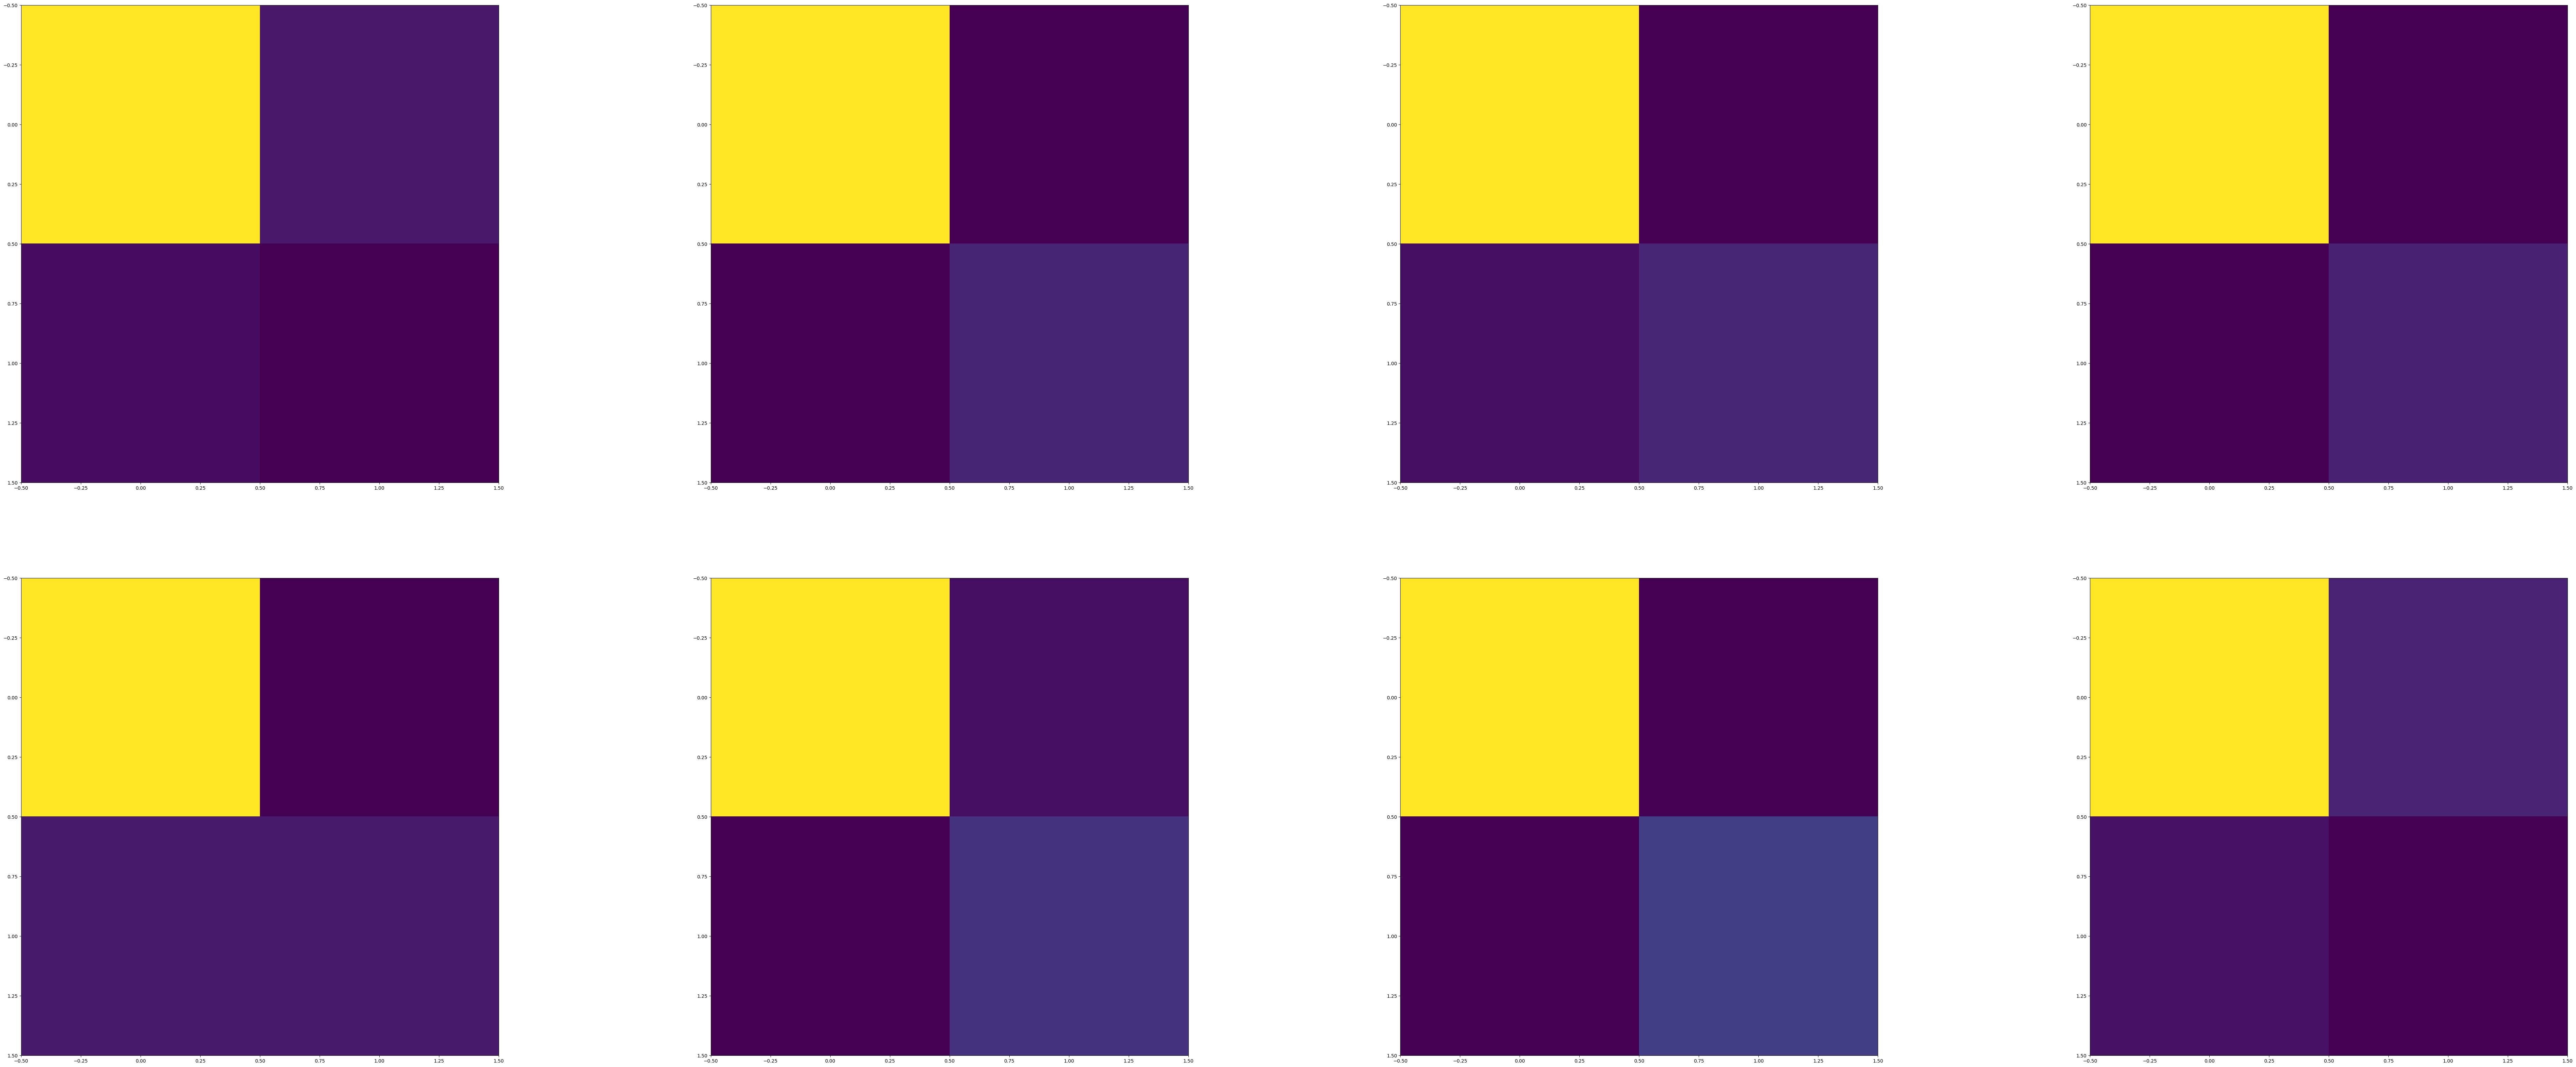

In [77]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
pca=sklearn.decomposition.PCA(n_components=70)
pcaed=pca.fit_transform(normalize(R.T,axis=1))
tmp=direction-1
print(pcaed.shape)
print(direction.shape)
#print(pca.explained_variance_ratio_)
#indices=list(permutations(range(len(R))))
print(indices[0])
model=linear_model.LogisticRegression(max_iter=1000,class_weight="balanced")

X_test,X_val,y_test,y_val=train_test_split(pcaed,tmp,test_size=0.2)

print(X_test.shape,y_test.shape)

model.fit(X_test,y_test)
#print(f1_score(X_val,y_val))
print(f1_score(model.predict(X_val),y_val,average=None))
print(accuracy_score(model.predict(X_val),y_val))
print(multilabel_confusion_matrix(y_val, model.predict(X_val)))
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(100,40))
tmp=0
for i in range(4):  
    for j in range(2):
        
        ax[j,i].imshow(multilabel_confusion_matrix(y_val, model.predict(X_val))[tmp])
        tmp+=1

[0.         0.4        0.57142857 0.6        0.66666667 1.
 0.53333333 0.44444444]
0.59375


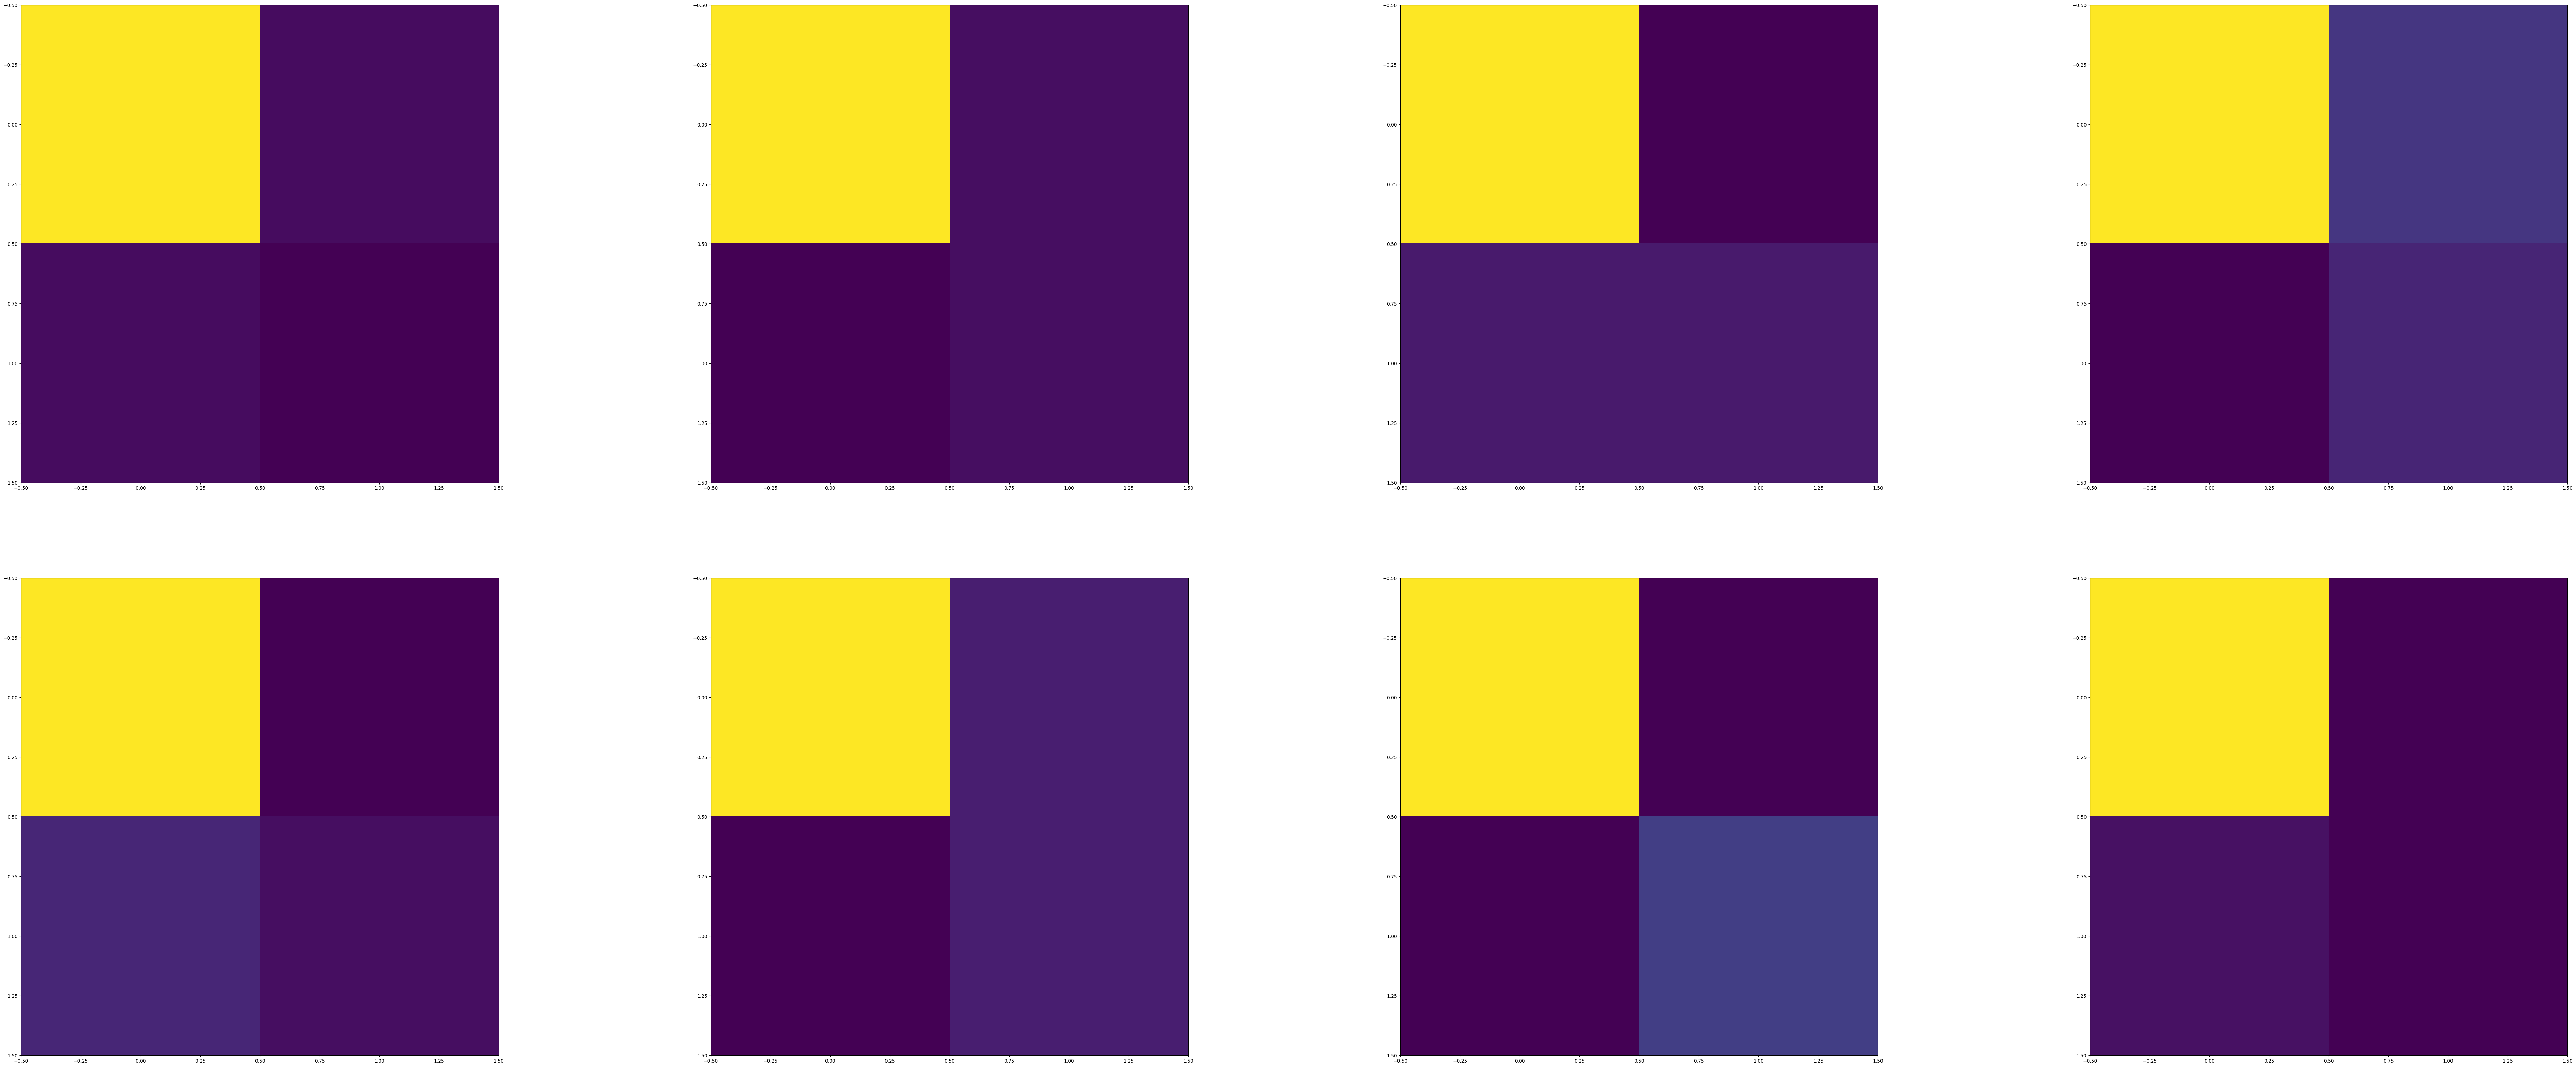

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=50,
                                  random_state=0).fit(X_test, y_test)

print(f1_score(model.predict(X_val),y_val,average=None))
print(accuracy_score(model.predict(X_val),y_val))
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_val, model.predict(X_val))
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(100,40))
tmp=0
for i in range(4):  
    for j in range(2):
        
        ax[j,i].imshow(multilabel_confusion_matrix(y_val, model.predict(X_val))[tmp])
        tmp+=1

In [ ]:
def sponehot(directions=directions):
    #4 movements up,down,right,left
    ans